In [1]:
import pandas as pd
import numpy as np
import sklearn 
# from load_data import * 
# from data_scraper import *
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# fields = "id,season,player,position,squad,age,games,minutes,goals,assists,cards_yellow,cards_red,overall,potential,pace,shooting,passing,dribbling,defending,physic,league,wage_eur,contract_signing"
# fields = fields.rsplit(',')
data = pd.read_csv('top5.csv', sep=',', encoding='utf8', engine="python", index_col=0, parse_dates = False).reset_index()
data

index  season             player nationality position  \
0         0    2022     Aaron Connolly      ie IRL       FW   
1         1    2022    Aaron Cresswell     eng ENG       DF   
2         2    2022       Aaron Hickey     sct SCO       DF   
3         3    2022       Aaron Lennon     eng ENG       MF   
4         4    2021   Aaron Leya Iseka      be BEL       FW   
...     ...     ...                ...         ...      ...   
4481   4481    2020  Łukasz Teodorczyk      pl POL    FW,DF   
4482   4482    2022      Šime Vrsaljko      hr CRO       DF   
4483   4483    2019          Žan Celar      si SVN       FW   
4484   4484    2020          Žan Majer      si SVN       MF   
4485   4485    2022        Ștefan Radu      ro ROU       DF   

                       squad  age  birth_year  games  games_starts  ...  \
0     Brighton & Hove Albion   21        2000   45.0          24.0  ...   
1            West Ham United   32        1989  100.0          98.0  ...   
2                    Bologna   19        2002   29.0          27.0  ...   
3                    Burnley   34        1987   38.0          19.0  ...   
4                    FC Metz   22        1997   71.0          33.0  ...   
...                      ...  ...         ...    ...           ...  ...   
4481                 Udinese   28        1991   30.0           3.0  ...   
4482      Atlético de Madrid   29        1992   30.0          19.0  ...   
4483                    Roma   19        1999    1.0           0.0  ...   
4484                   Lecce   27        1992   27.0          19.0  ...   
4485                   Lazio   35        1986   91.0          87.0  ...   

      overall  potential  pace  shooting  passing  dribbling  defending  \
0        70.0       77.0  75.0      70.0     50.0       71.0       20.0   
1        79.0       79.0  70.0      60.0     75.0       76.0       77.0   
2        69.0       82.0  69.0      50.0     65.0       67.0       66.0   
3        73.0       73.0  78.0      60.0     70.0       77.0       48.0   
4        70.0       75.0  82.0      71.0     60.0       69.0       27.0   
...       ...        ...   ...       ...      ...        ...        ...   
4481     69.0       69.0  58.0      70.0     57.0       63.0       32.0   
4482     80.0       80.0  79.0      55.0     73.0       74.0       78.0   
4483     64.0       74.0  71.0      62.0     44.0       64.0       26.0   
4484     67.0       67.0  61.0      58.0     69.0       70.0       55.0   
4485      NaN        NaN   NaN       NaN      NaN        NaN        NaN   

      physic  wage_eur   value_eur  
0       64.0   23000.0   3300000.0  
1       68.0   66000.0  12500000.0  
2       56.0    7000.0   3200000.0  
3       56.0   28000.0   1400000.0  
4       71.0   22000.0   2400000.0  
...      ...       ...         ...  
4481    71.0    9000.0   1400000.0  
4482    77.0   56000.0  18500000.0  
4483    68.0    3000.0   1300000.0  
4484    65.0    2000.0   1000000.0  
4485     NaN       NaN         NaN  

[4486 rows x 188 columns]

In [3]:
data.season = data.season.astype('category')
data.position = data.position.astype('category')
data.nationality = data.nationality.astype('category')

# data.today = pd.Series(pd.to_datetime("today"))
# data.contract_signing = data.apply(lambda row:(pd.to_datetime("today") - pd.to_datetime(row.contract_signing)).days, axis = 1)
# data.contract_signing = data.contract_signing.fillna(0)


In [4]:
data_with_wage = data[~data['wage_eur'].isna()]
data_without_wage = data[data['wage_eur'].isna()]
print(len(data))
data_with_wage
# data_with_wage[data_with_wage['id'] == 10104]

4486


index season             player nationality position  \
0         0   2022     Aaron Connolly      ie IRL       FW   
1         1   2022    Aaron Cresswell     eng ENG       DF   
2         2   2022       Aaron Hickey     sct SCO       DF   
3         3   2022       Aaron Lennon     eng ENG       MF   
4         4   2021   Aaron Leya Iseka      be BEL       FW   
...     ...    ...                ...         ...      ...   
4480   4480   2022   Łukasz Skorupski      pl POL       GK   
4481   4481   2020  Łukasz Teodorczyk      pl POL    FW,DF   
4482   4482   2022      Šime Vrsaljko      hr CRO       DF   
4483   4483   2019          Žan Celar      si SVN       FW   
4484   4484   2020          Žan Majer      si SVN       MF   

                       squad  age  birth_year  games  games_starts  ...  \
0     Brighton & Hove Albion   21        2000   45.0          24.0  ...   
1            West Ham United   32        1989  100.0          98.0  ...   
2                    Bologna   19        2002   29.0          27.0  ...   
3                    Burnley   34        1987   38.0          19.0  ...   
4                    FC Metz   22        1997   71.0          33.0  ...   
...                      ...  ...         ...    ...           ...  ...   
4480                 Bologna   30        1991  121.0         121.0  ...   
4481                 Udinese   28        1991   30.0           3.0  ...   
4482      Atlético de Madrid   29        1992   30.0          19.0  ...   
4483                    Roma   19        1999    1.0           0.0  ...   
4484                   Lecce   27        1992   27.0          19.0  ...   

      overall  potential  pace  shooting  passing  dribbling  defending  \
0        70.0       77.0  75.0      70.0     50.0       71.0       20.0   
1        79.0       79.0  70.0      60.0     75.0       76.0       77.0   
2        69.0       82.0  69.0      50.0     65.0       67.0       66.0   
3        73.0       73.0  78.0      60.0     70.0       77.0       48.0   
4        70.0       75.0  82.0      71.0     60.0       69.0       27.0   
...       ...        ...   ...       ...      ...        ...        ...   
4480     75.0       76.0   NaN       NaN      NaN        NaN        NaN   
4481     69.0       69.0  58.0      70.0     57.0       63.0       32.0   
4482     80.0       80.0  79.0      55.0     73.0       74.0       78.0   
4483     64.0       74.0  71.0      62.0     44.0       64.0       26.0   
4484     67.0       67.0  61.0      58.0     69.0       70.0       55.0   

      physic  wage_eur   value_eur  
0       64.0   23000.0   3300000.0  
1       68.0   66000.0  12500000.0  
2       56.0    7000.0   3200000.0  
3       56.0   28000.0   1400000.0  
4       71.0   22000.0   2400000.0  
...      ...       ...         ...  
4480     NaN   22000.0   4200000.0  
4481    71.0    9000.0   1400000.0  
4482    77.0   56000.0  18500000.0  
4483    68.0    3000.0   1300000.0  
4484    65.0    2000.0   1000000.0  

[3408 rows x 188 columns]

In [5]:
data_with_value = data[~data['value_eur'].isna()]
data_without_value = data[data['value_eur'].isna()]
print(len(data))
data_with_value

4486


index season             player nationality position  \
0         0   2022     Aaron Connolly      ie IRL       FW   
1         1   2022    Aaron Cresswell     eng ENG       DF   
2         2   2022       Aaron Hickey     sct SCO       DF   
3         3   2022       Aaron Lennon     eng ENG       MF   
4         4   2021   Aaron Leya Iseka      be BEL       FW   
...     ...    ...                ...         ...      ...   
4480   4480   2022   Łukasz Skorupski      pl POL       GK   
4481   4481   2020  Łukasz Teodorczyk      pl POL    FW,DF   
4482   4482   2022      Šime Vrsaljko      hr CRO       DF   
4483   4483   2019          Žan Celar      si SVN       FW   
4484   4484   2020          Žan Majer      si SVN       MF   

                       squad  age  birth_year  games  games_starts  ...  \
0     Brighton & Hove Albion   21        2000   45.0          24.0  ...   
1            West Ham United   32        1989  100.0          98.0  ...   
2                    Bologna   19        2002   29.0          27.0  ...   
3                    Burnley   34        1987   38.0          19.0  ...   
4                    FC Metz   22        1997   71.0          33.0  ...   
...                      ...  ...         ...    ...           ...  ...   
4480                 Bologna   30        1991  121.0         121.0  ...   
4481                 Udinese   28        1991   30.0           3.0  ...   
4482      Atlético de Madrid   29        1992   30.0          19.0  ...   
4483                    Roma   19        1999    1.0           0.0  ...   
4484                   Lecce   27        1992   27.0          19.0  ...   

      overall  potential  pace  shooting  passing  dribbling  defending  \
0        70.0       77.0  75.0      70.0     50.0       71.0       20.0   
1        79.0       79.0  70.0      60.0     75.0       76.0       77.0   
2        69.0       82.0  69.0      50.0     65.0       67.0       66.0   
3        73.0       73.0  78.0      60.0     70.0       77.0       48.0   
4        70.0       75.0  82.0      71.0     60.0       69.0       27.0   
...       ...        ...   ...       ...      ...        ...        ...   
4480     75.0       76.0   NaN       NaN      NaN        NaN        NaN   
4481     69.0       69.0  58.0      70.0     57.0       63.0       32.0   
4482     80.0       80.0  79.0      55.0     73.0       74.0       78.0   
4483     64.0       74.0  71.0      62.0     44.0       64.0       26.0   
4484     67.0       67.0  61.0      58.0     69.0       70.0       55.0   

      physic  wage_eur   value_eur  
0       64.0   23000.0   3300000.0  
1       68.0   66000.0  12500000.0  
2       56.0    7000.0   3200000.0  
3       56.0   28000.0   1400000.0  
4       71.0   22000.0   2400000.0  
...      ...       ...         ...  
4480     NaN   22000.0   4200000.0  
4481    71.0    9000.0   1400000.0  
4482    77.0   56000.0  18500000.0  
4483    68.0    3000.0   1300000.0  
4484    65.0    2000.0   1000000.0  

[3408 rows x 188 columns]

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

corr = data_with_value.corr()


heat = go.Heatmap(
    z = corr,
    x = corr.columns.values,
    y = corr.columns.values,
    zmin = - 1, # Sets the lower bound of the color domain
    zmax = 1,
    xgap = 1, # Sets the horizontal gap (in pixels) between bricks
    ygap = 1,
    colorscale = 'RdBu'
)

title = 'Asset Correlation Matrix'

layout = go.Layout(
    title_text=title, 
    title_x=0.5, 
    width=600, 
    height=600,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig=go.Figure(data=[heat], layout=layout)
fig.show()

In [7]:
corr = data_with_value.corr().abs()
mask = (np.tril(np.ones(corr.shape))-np.identity(corr.shape[0])).astype(np.bool)
df_lt = corr.where(mask)
s = df_lt.unstack().dropna()
so = s.sort_values(kind="quicksort", ascending = False)
so

minutes                 minutes_90s              9.999991e-01
dribbles_completed      players_dribbled_past    9.991323e-01
games_starts            minutes                  9.983265e-01
                        minutes_90s              9.983246e-01
passes_completed_short  passes_short             9.978687e-01
                                                     ...     
sca_defense             plus_minus_wowy          8.254079e-05
dribbled_past           xg_plus_minus_wowy       7.285778e-05
cards_yellow            wc_cards_red             4.781828e-05
passes_completed        plus_minus_wowy          2.539665e-05
corner_kicks_in         aerials_won              5.377486e-07
Length: 16653, dtype: float64

In [15]:
# iter_pair = so.axes[0].__iter__()
pair1, pair2 = next(iter_pair)
print(pair1)
print(pair2)

px.scatter(data_with_value, x=pair1, y=pair2)


carries
passes_received


(array([370., 432., 277., 342., 207., 283., 191., 203.,  99., 134.,  71.,
         97.,  68.,  79.,  47.,  50.,  38.,  35.,  30.,  29.,  15.,  36.,
         14.,  29.,  14.,  18.,   0.,  20.,  14.,  15.,   0.,  10.,  11.,
          0.,  12.,   7.,   0.,  13.,   3.,   7.,   0.,   6.,   7.,   0.,
          4.,   5.,   0.,   3.,   6.,   4.,   0.,   3.,   6.,   0.,   5.,
          1.,   0.,   6.,   0.,   2.,   0.,   0.,   4.,   0.,   0.,   3.,
          0.,   0.,   2.,   0.,   0.,   5.,   0.,   0.,   2.,   0.,   0.,
          6.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([   500.,   3995.,   7490.,  10985.,  14480.,  17975.,  21470.,
         24965.,  28460.,  31955.,  35450.,  38945.,  42440.,  45935.,
         49430.,  52925.,  56420.,  59915.,  63410.,  66905.,  70400.,
         73895.,  77390.,  80885.,  84380.,  87875.,  91370.,  94865.,
         98360., 101855., 105350.,

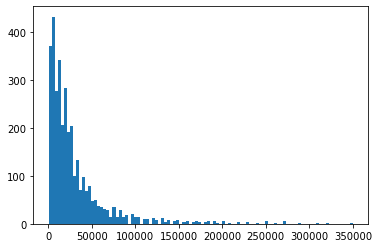

In [13]:
plt.hist(y, bins=100)

index


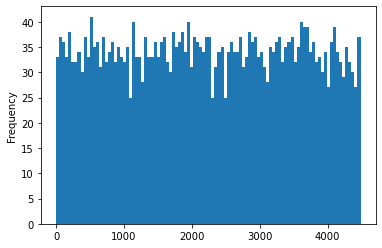

season
player
nationality
position
squad
age


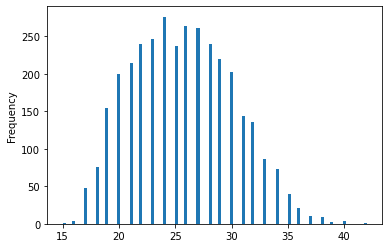

birth_year


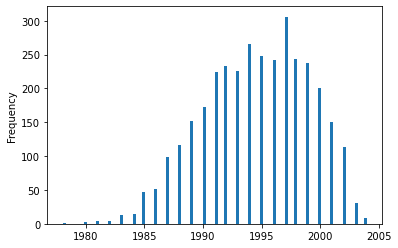

games


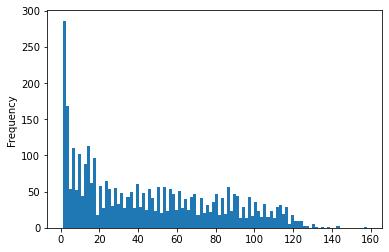

games_starts


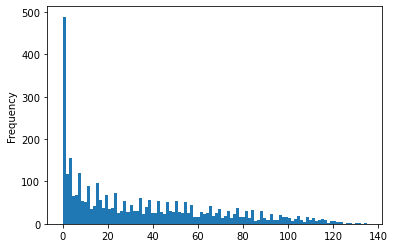

minutes


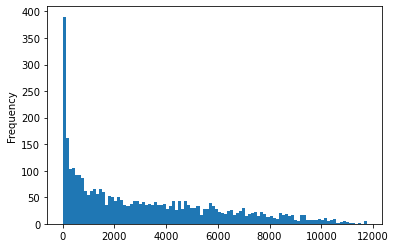

goals


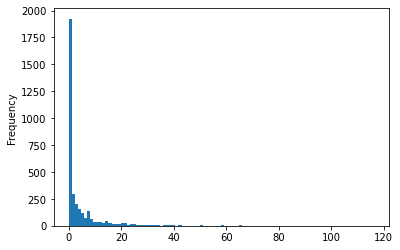

assists


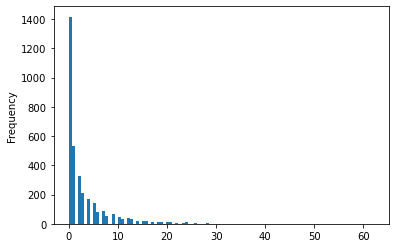

pens_made


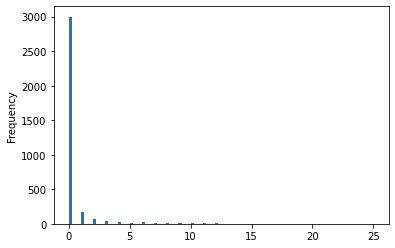

pens_att


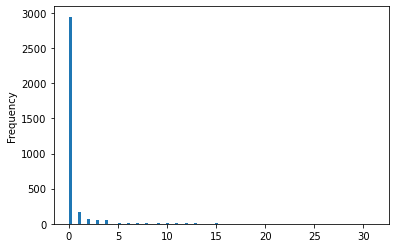

cards_yellow


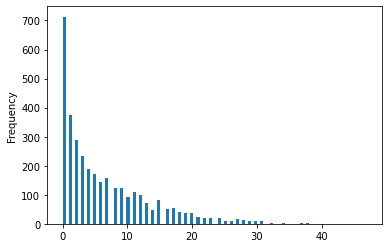

cards_red


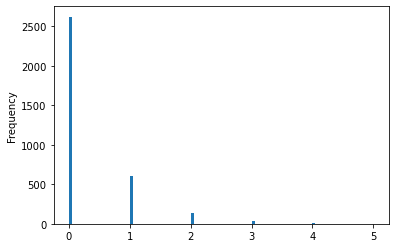

goals_per90


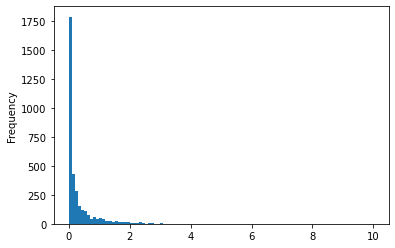

assists_per90


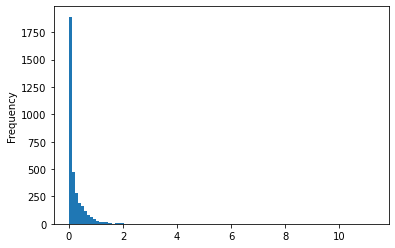

goals_assists_per90


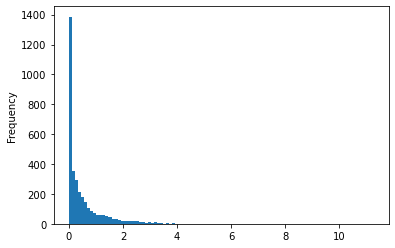

goals_pens_per90


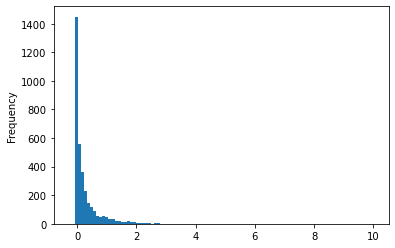

goals_assists_pens_per90


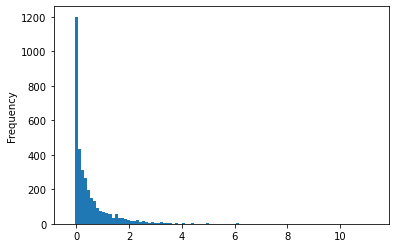

xg


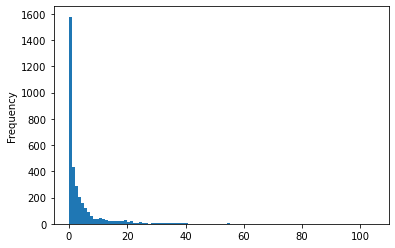

npxg


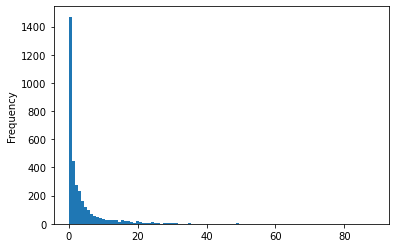

xa


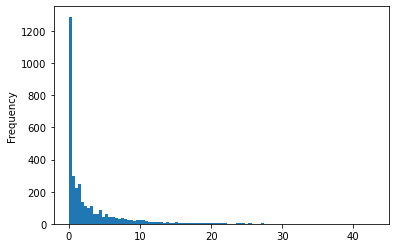

xg_per90


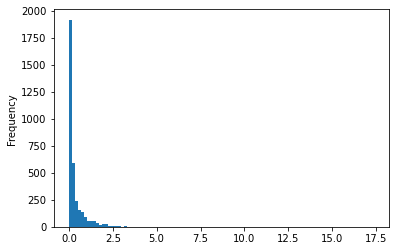

xa_per90


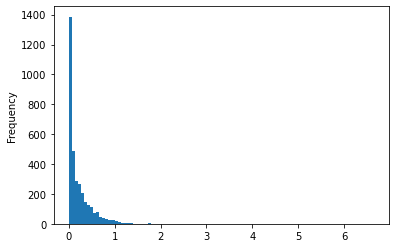

xg_xa_per90


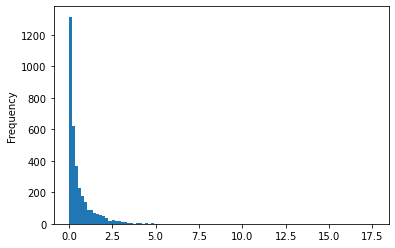

npxg_per90


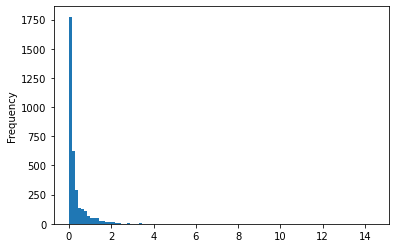

npxg_xa_per90


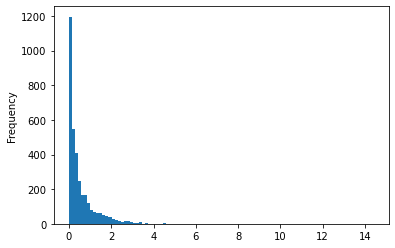

minutes_90s


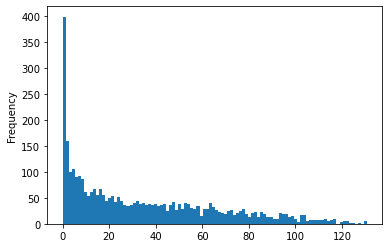

shots_total


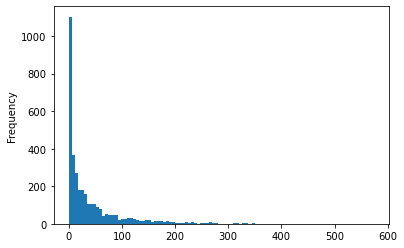

shots_on_target


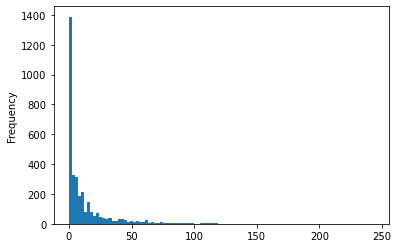

shots_free_kicks


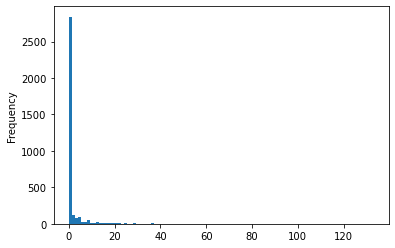

shots_on_target_pct


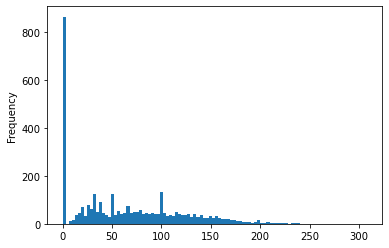

shots_total_per90


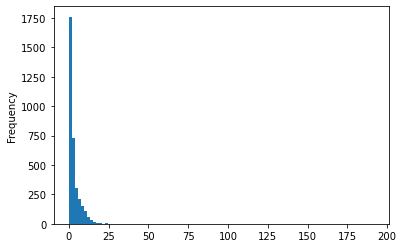

shots_on_target_per90


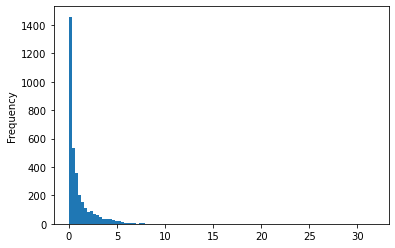

goals_per_shot


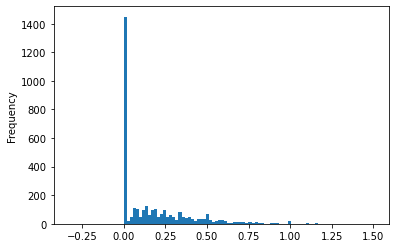

goals_per_shot_on_target


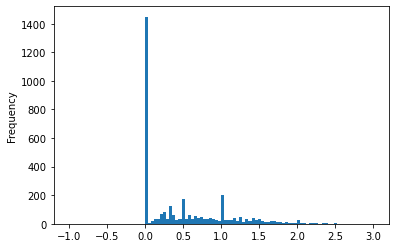

npxg_per_shot


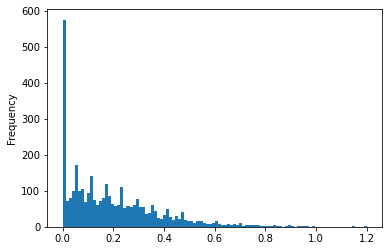

xg_net


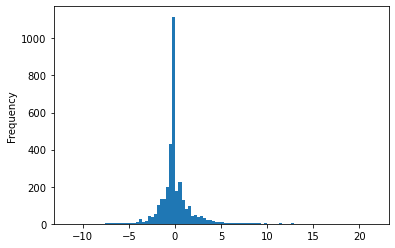

npxg_net


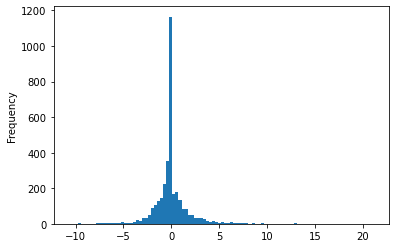

passes_completed


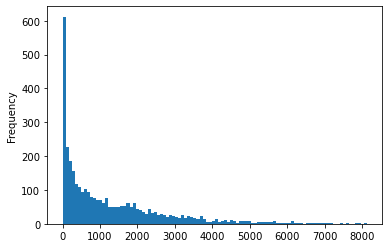

passes


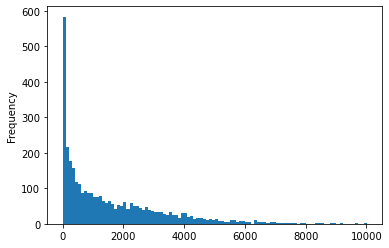

passes_pct


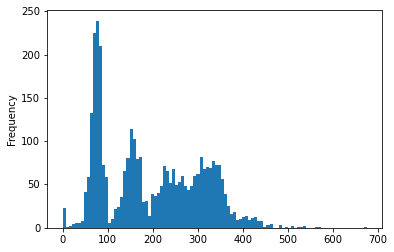

passes_total_distance


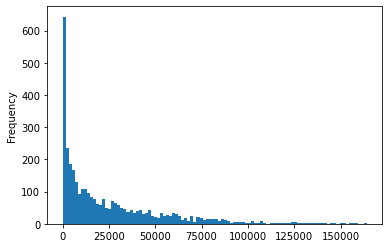

passes_progressive_distance


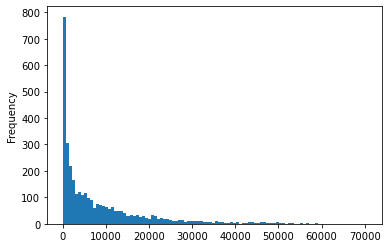

passes_completed_short


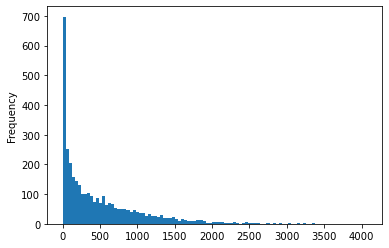

passes_short


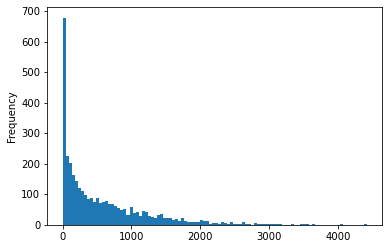

passes_pct_short


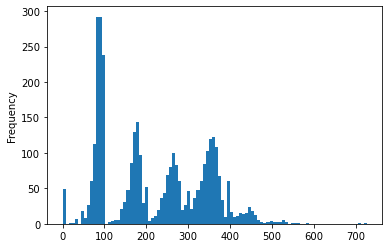

passes_completed_medium


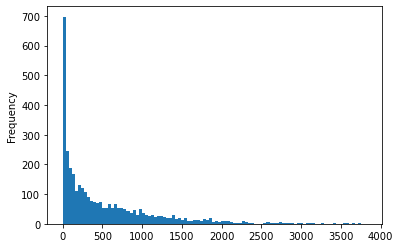

passes_medium


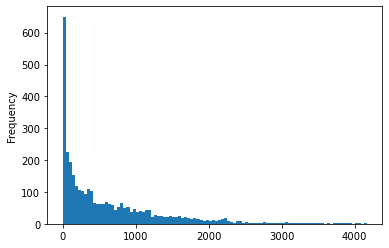

passes_pct_medium


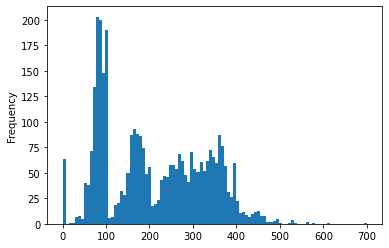

passes_completed_long


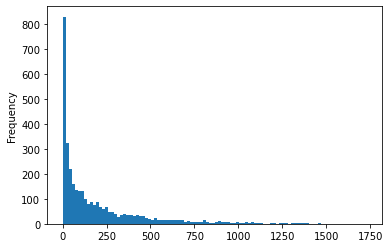

passes_long


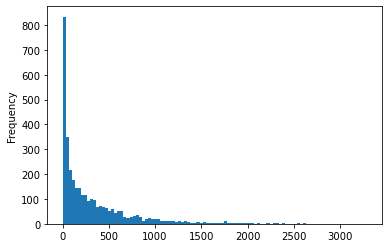

passes_pct_long


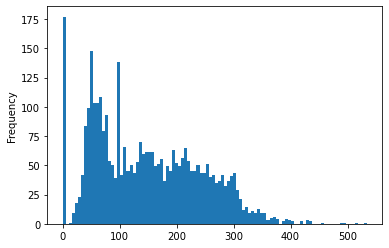

xa_net


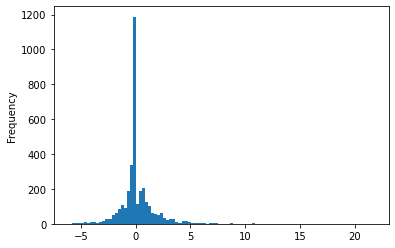

assisted_shots


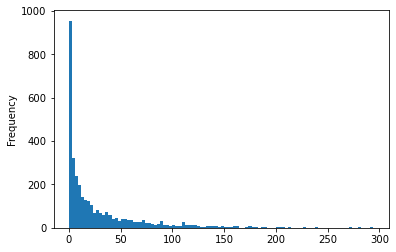

passes_into_final_third


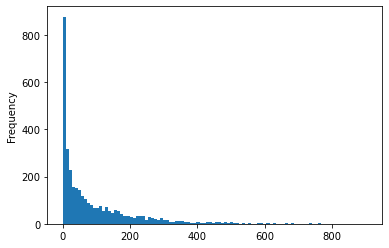

passes_into_penalty_area


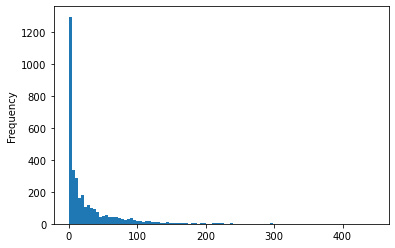

crosses_into_penalty_area


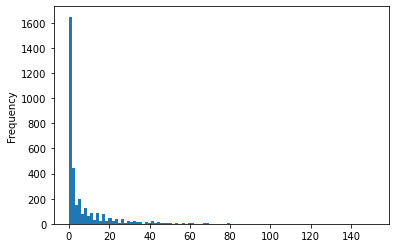

progressive_passes


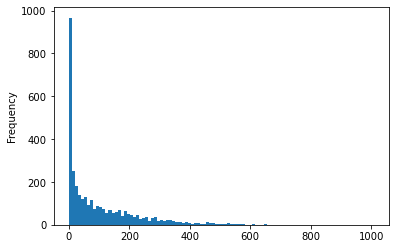

passes_live


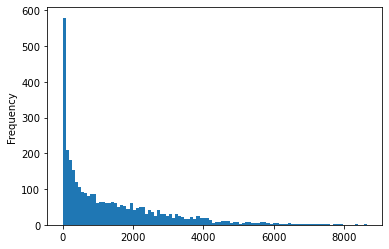

passes_dead


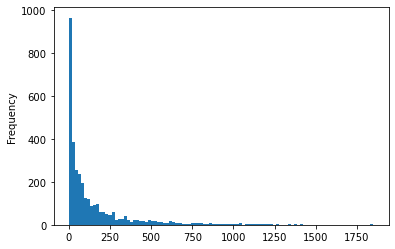

passes_free_kicks


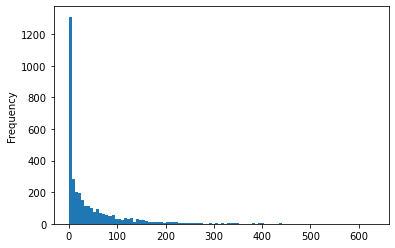

through_balls


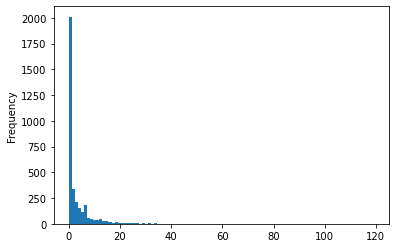

passes_pressure


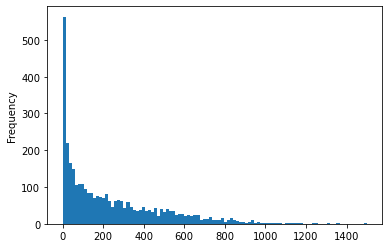

passes_switches


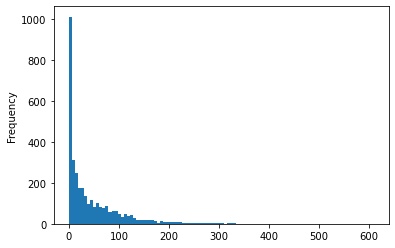

crosses


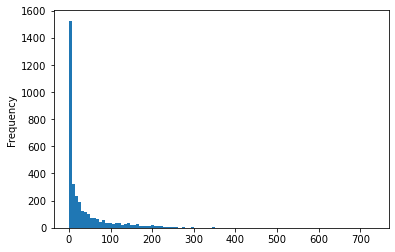

corner_kicks


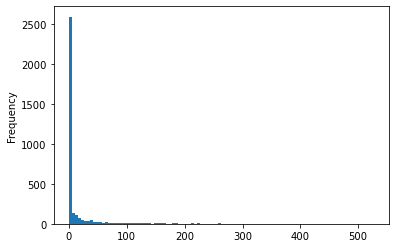

corner_kicks_in


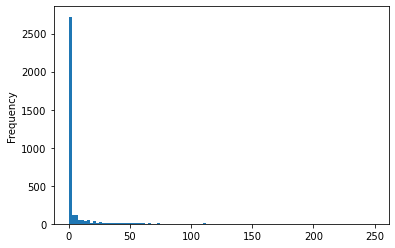

corner_kicks_out


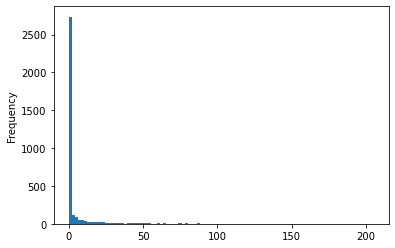

corner_kicks_straight


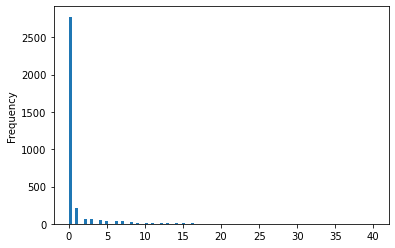

passes_ground


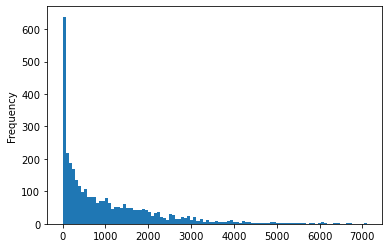

passes_low


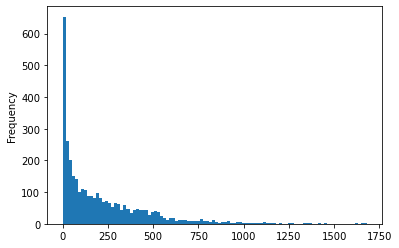

passes_high


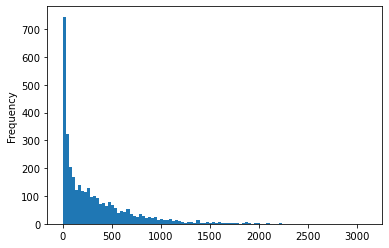

passes_left_foot


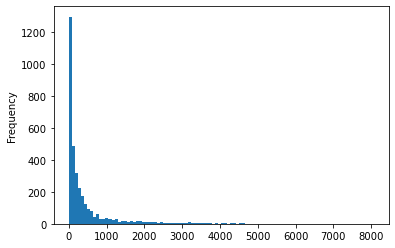

passes_right_foot


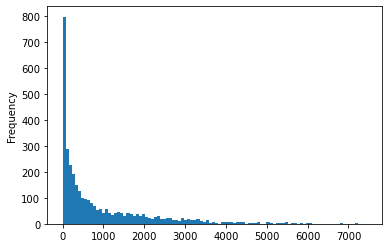

passes_head


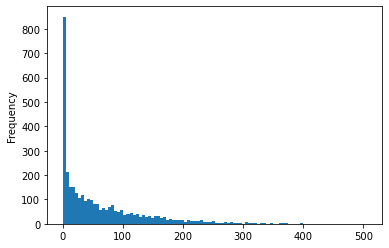

throw_ins


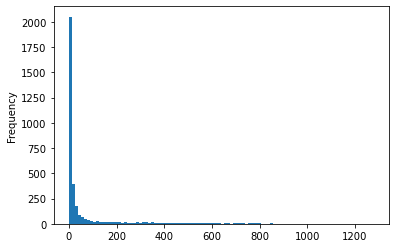

passes_other_body


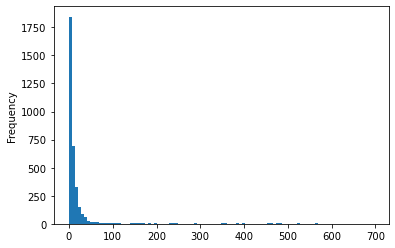

passes_offsides


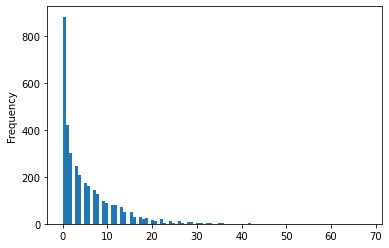

passes_oob


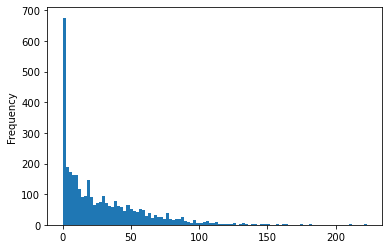

passes_intercepted


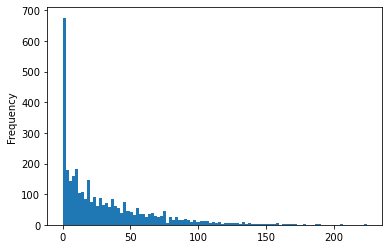

passes_blocked


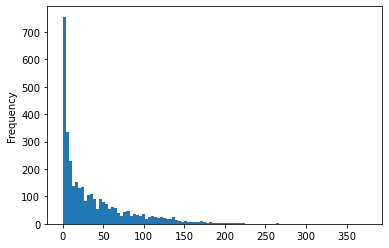

sca


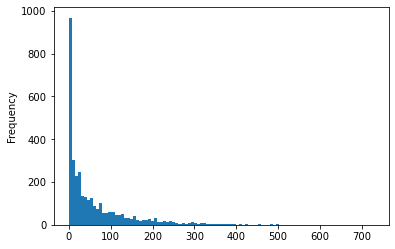

sca_per90


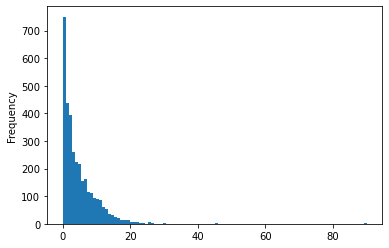

sca_passes_live


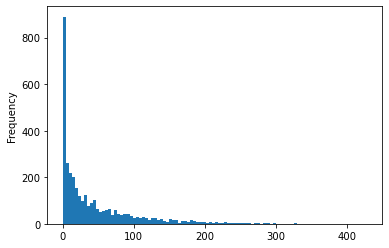

sca_passes_dead


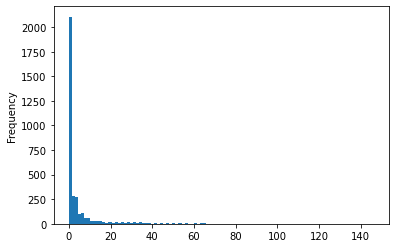

sca_dribbles


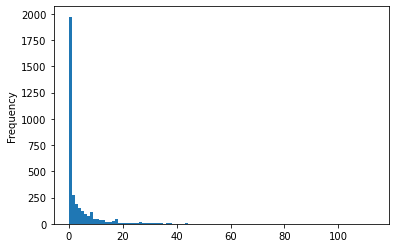

sca_shots


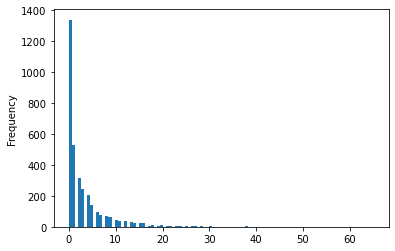

sca_fouled


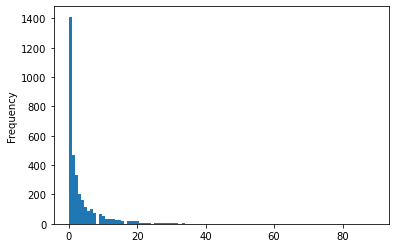

sca_defense


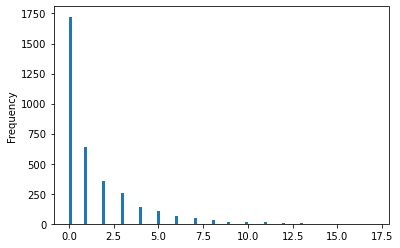

gca


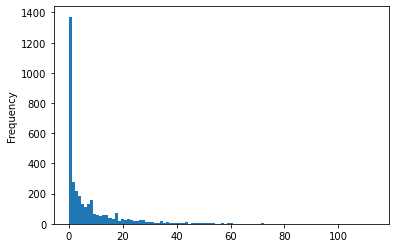

gca_per90


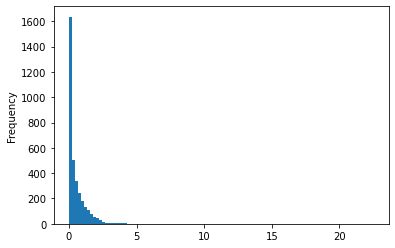

gca_passes_live


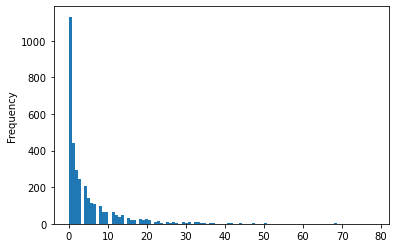

gca_passes_dead


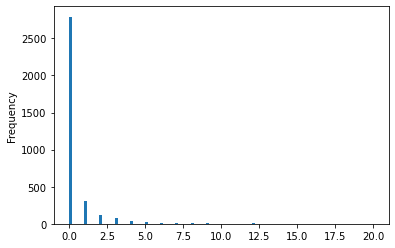

gca_dribbles


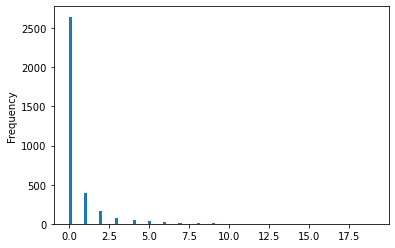

gca_shots


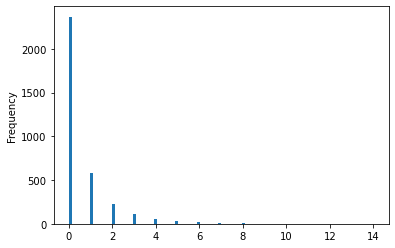

gca_fouled


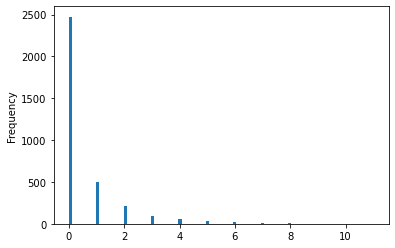

gca_defense


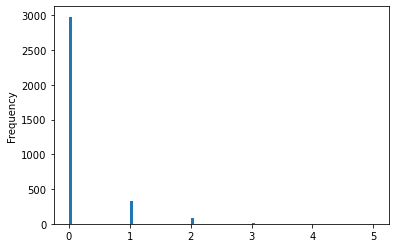

tackles


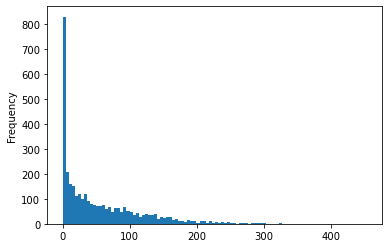

tackles_won


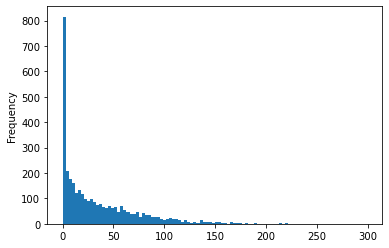

tackles_def_3rd


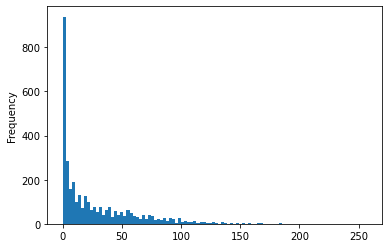

tackles_mid_3rd


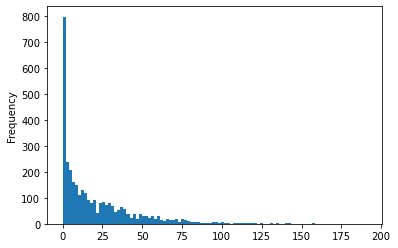

tackles_att_3rd


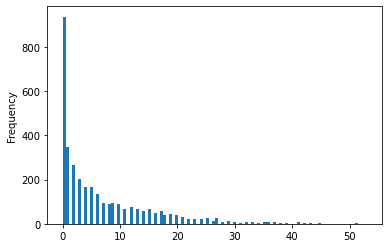

dribble_tackles


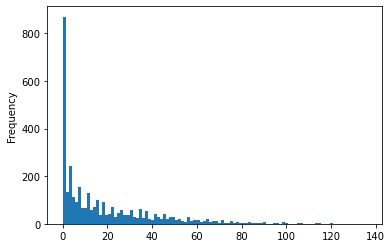

dribbles_vs


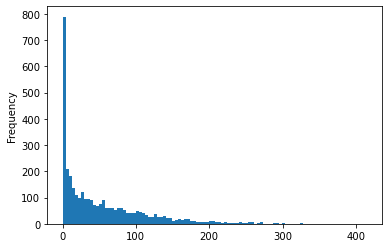

dribble_tackles_pct


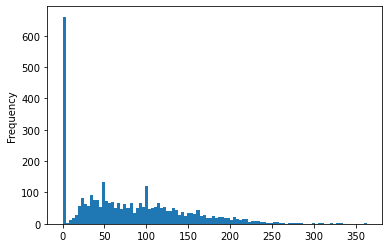

dribbled_past


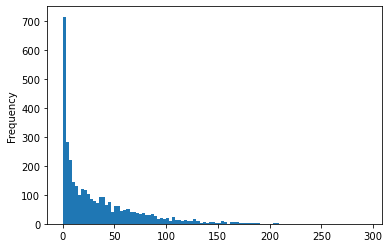

pressures


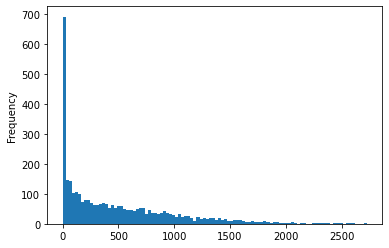

pressure_regains


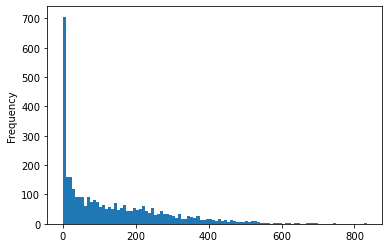

pressure_regain_pct


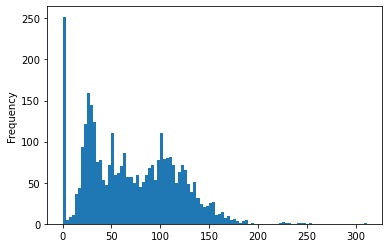

pressures_def_3rd


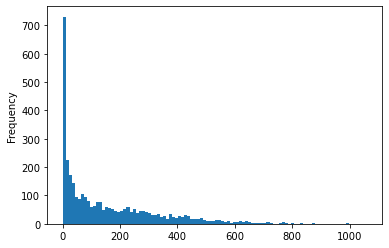

pressures_mid_3rd


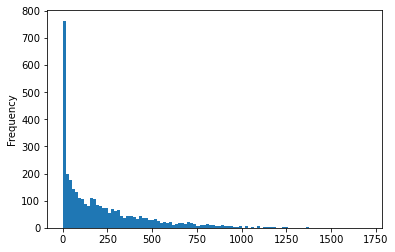

pressures_att_3rd


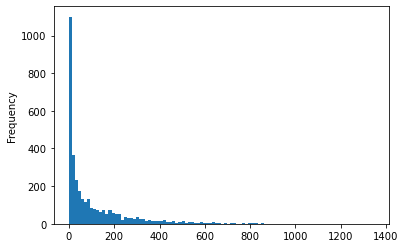

blocks


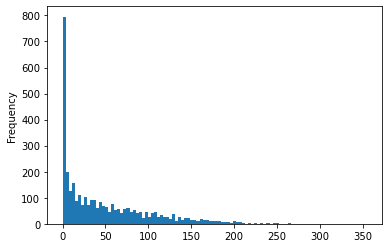

blocked_shots


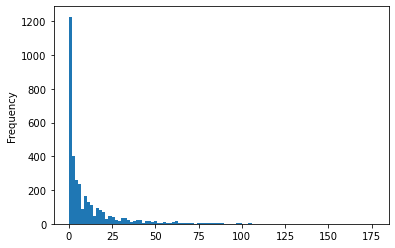

blocked_shots_saves


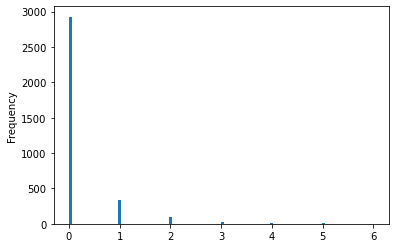

blocked_passes


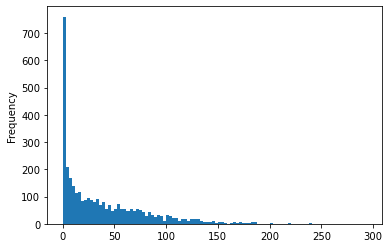

interceptions


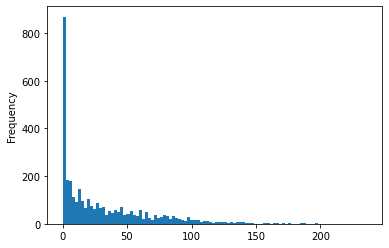

clearances


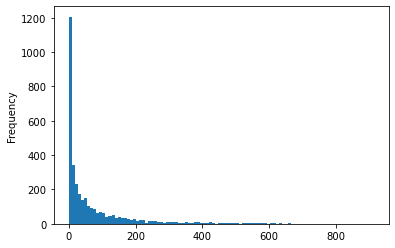

errors


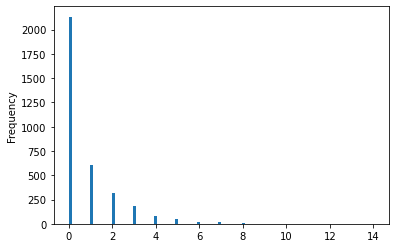

touches


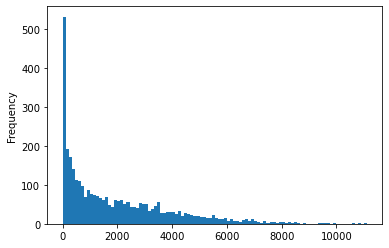

touches_def_pen_area


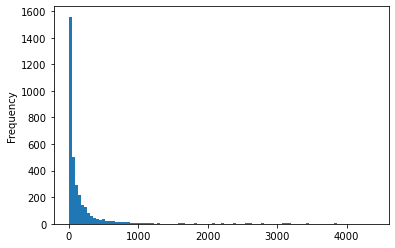

touches_def_3rd


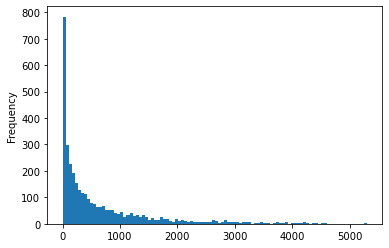

touches_mid_3rd


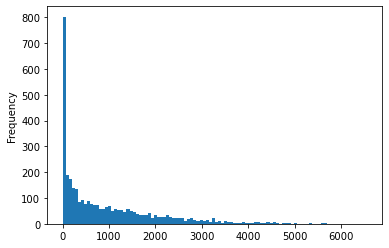

touches_att_3rd


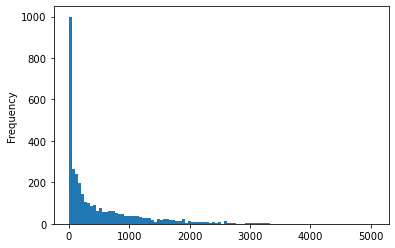

touches_att_pen_area


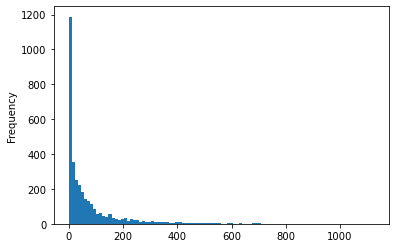

touches_live_ball


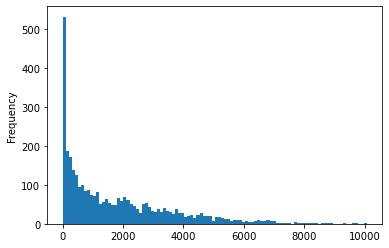

dribbles_completed


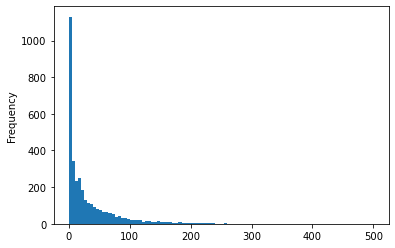

dribbles


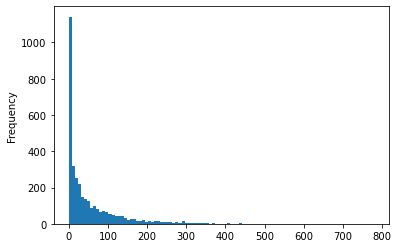

dribbles_completed_pct


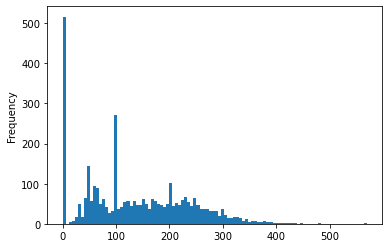

players_dribbled_past


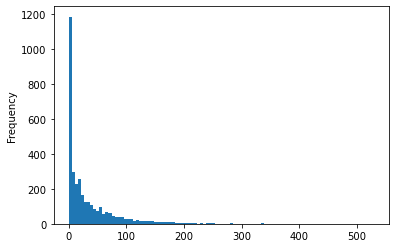

nutmegs


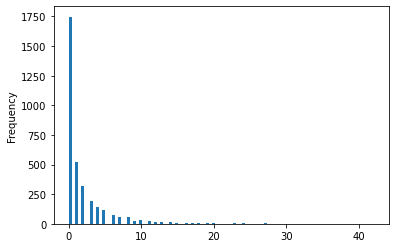

carries


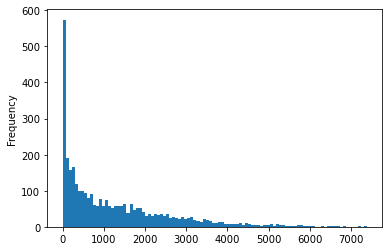

carry_distance


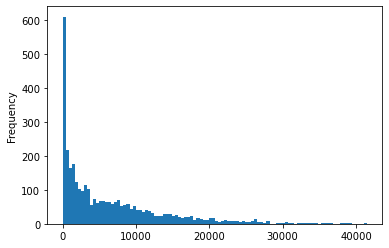

carry_progressive_distance


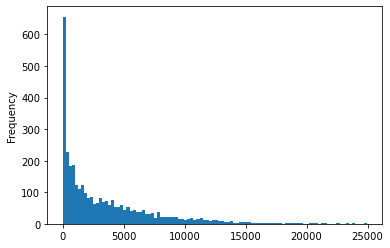

progressive_carries


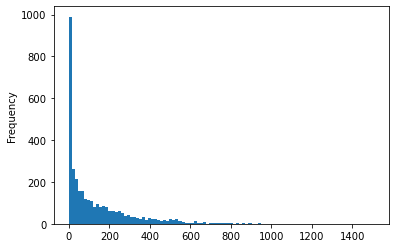

carries_into_final_third


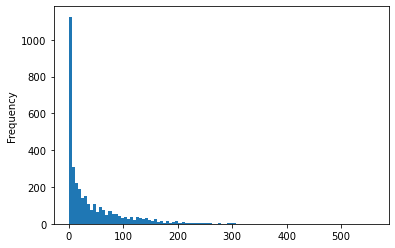

carries_into_penalty_area


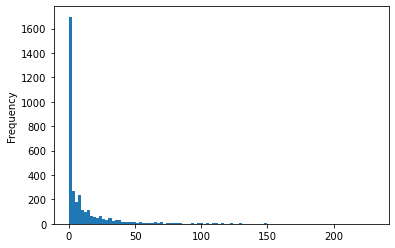

pass_targets


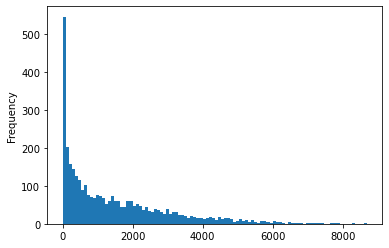

passes_received


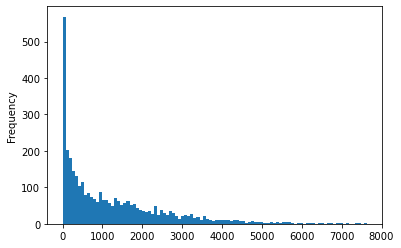

passes_received_pct


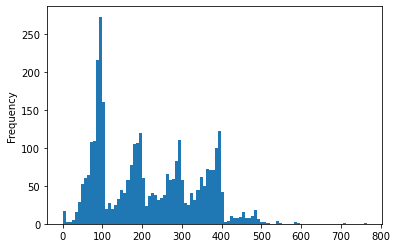

miscontrols


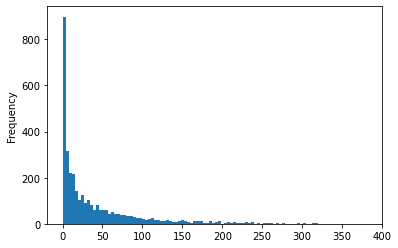

dispossessed


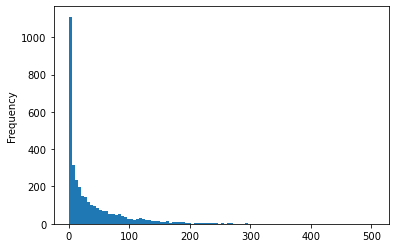

cards_yellow_red


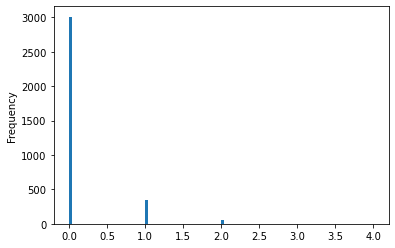

fouls


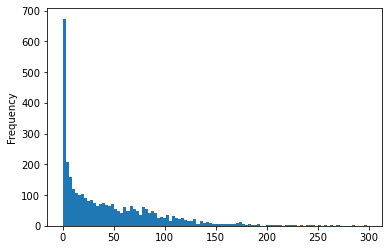

fouled


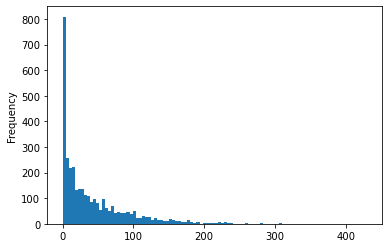

offsides


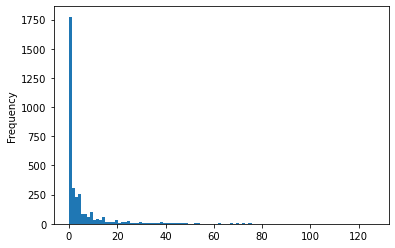

pens_won


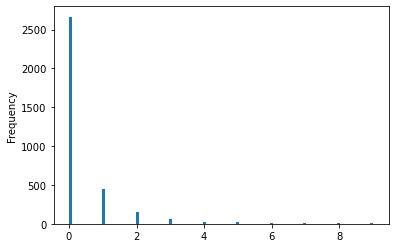

pens_conceded


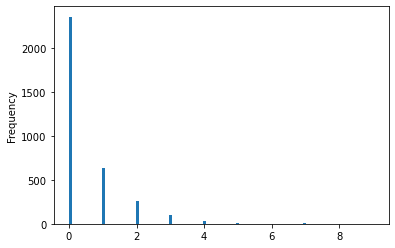

own_goals


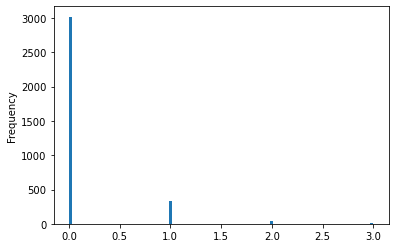

ball_recoveries


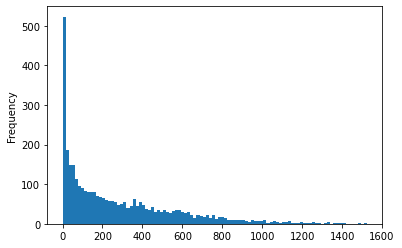

aerials_won


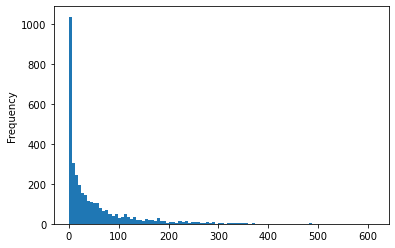

aerials_lost


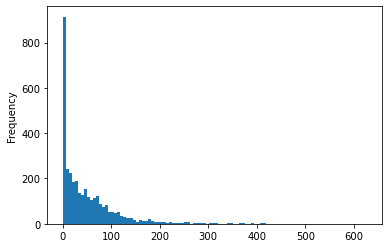

aerials_won_pct


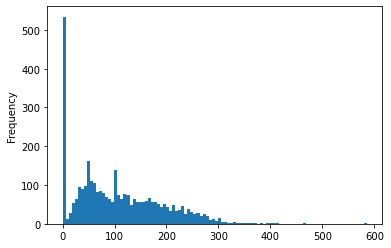

games_subs


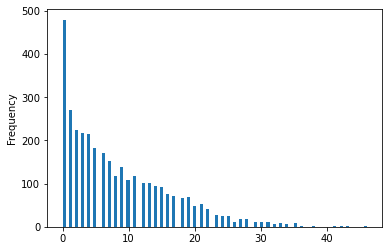

minutes_per_sub


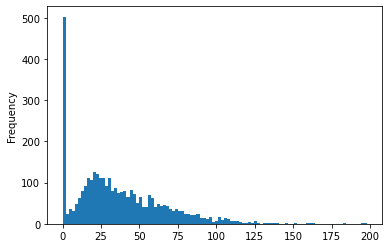

unused_subs


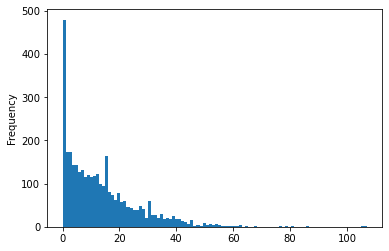

points_per_match


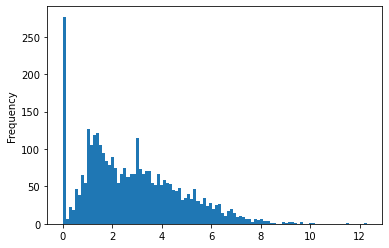

on_goals_for


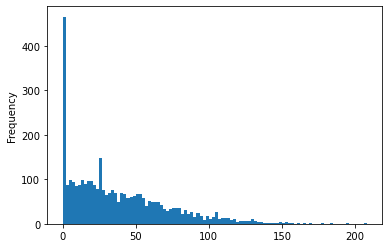

on_goals_against


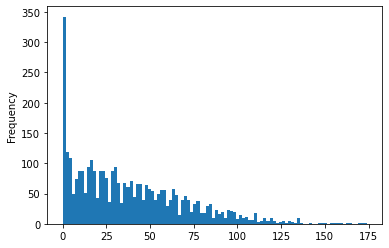

plus_minus


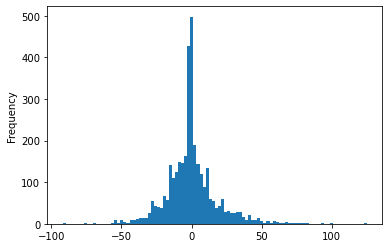

plus_minus_per90


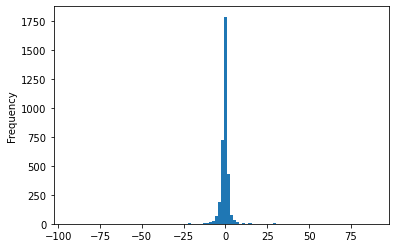

plus_minus_wowy


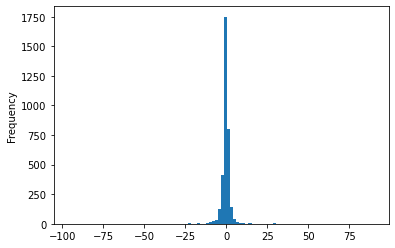

on_xg_for


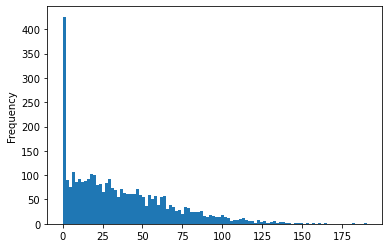

on_xg_against


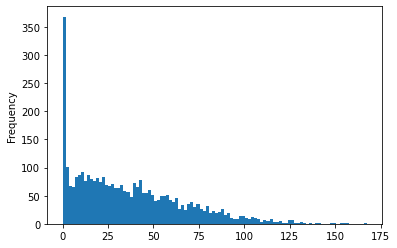

xg_plus_minus


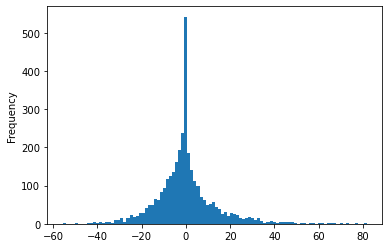

xg_plus_minus_per90


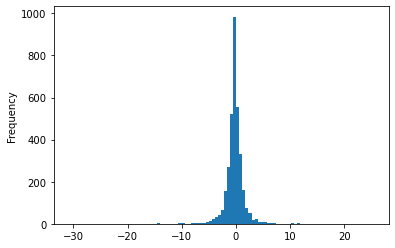

xg_plus_minus_wowy


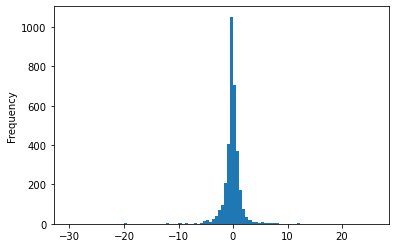

wc_starts


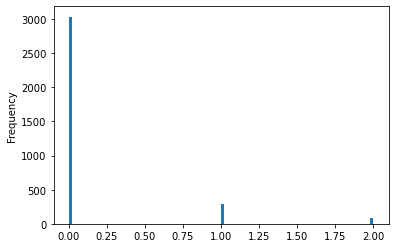

wc_games


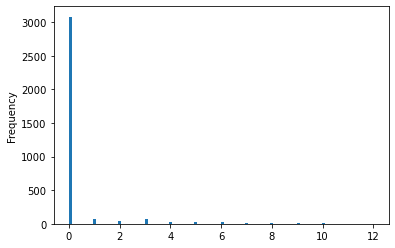

wc_minutes


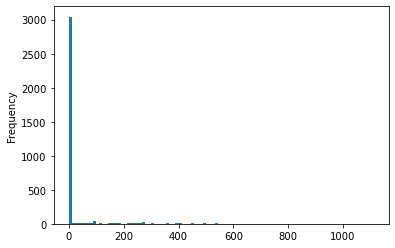

wc_goals


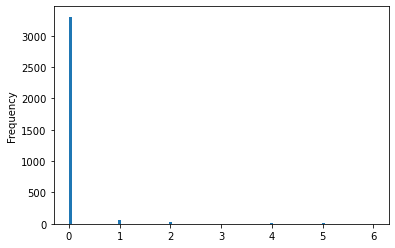

wc_assists


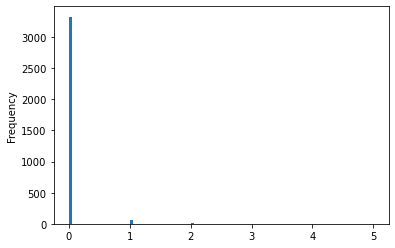

wc_cards_yellow


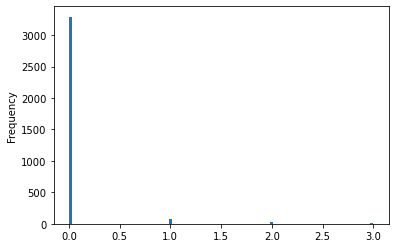

wc_cards_red


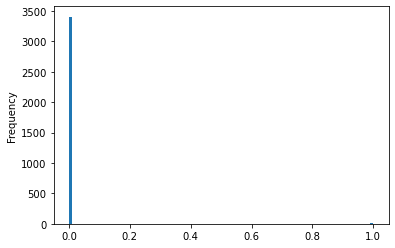

overall


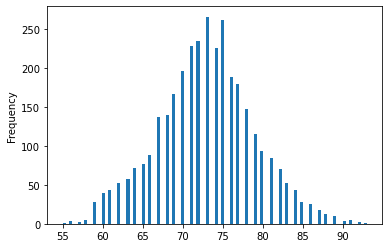

potential


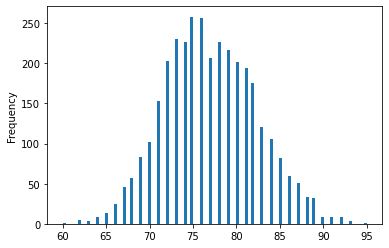

pace


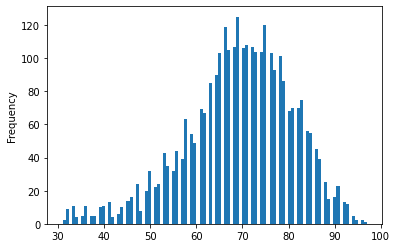

shooting


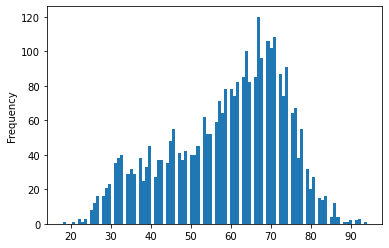

passing


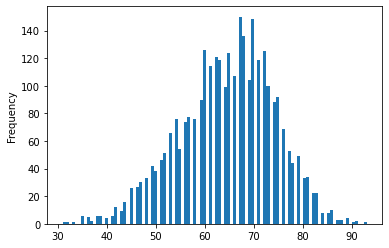

dribbling


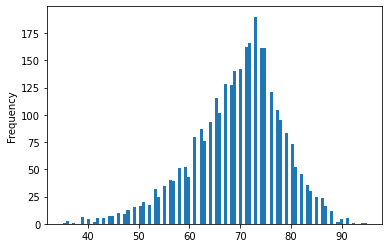

defending


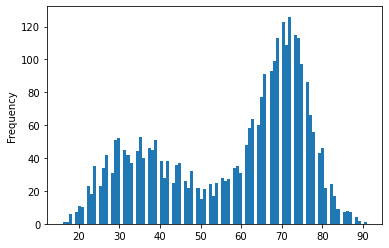

physic


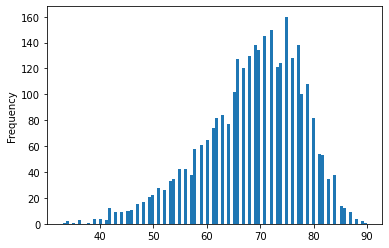

wage_eur


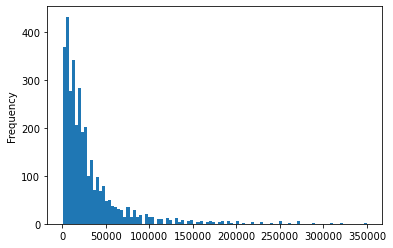

value_eur


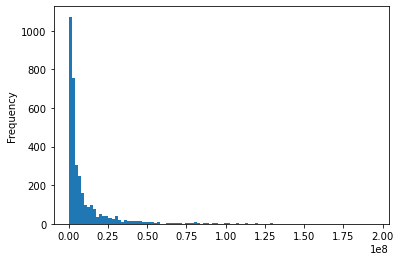

In [90]:
y = data_with_wage["wage_eur"]
y = pd.to_numeric(y, errors ="coerce")
for i in data_with_value.columns:
    print(i)
    x = data_with_wage[i]
    
#     data_with_wage.pivot(columns="position", values=i).plot.hist(bins=100)
    if x.dtypes == 'int64' or x.dtypes == "float64":
        data_with_wage[i].plot.hist(bins = 100)
        plt.show()

In [89]:
x.dtypes 

dtype('float64')

age


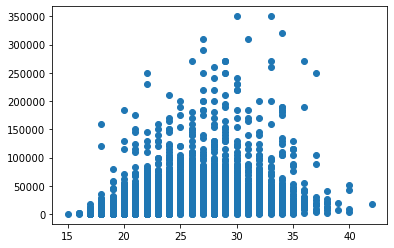

games


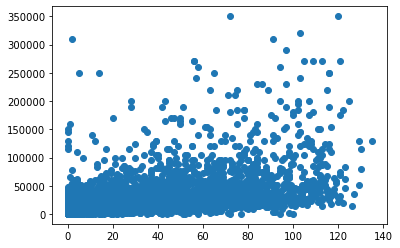

minutes


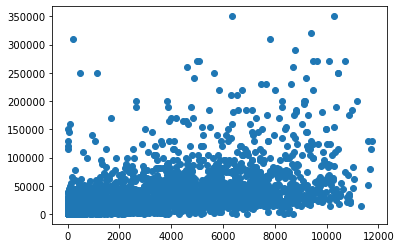

goals


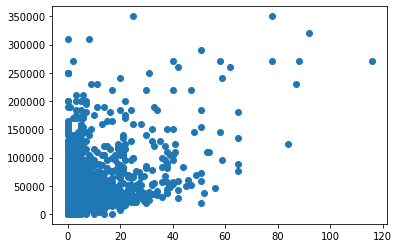

assists


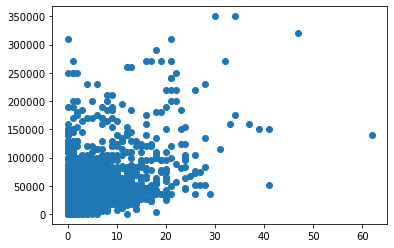

cards_yellow


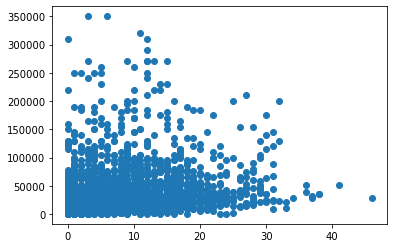

cards_red


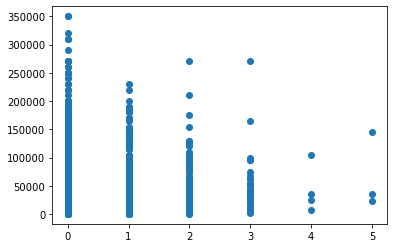

overall


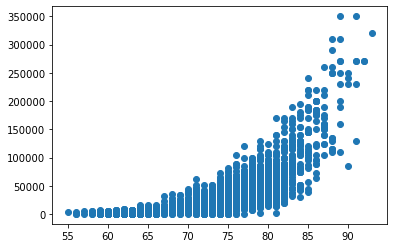

potential


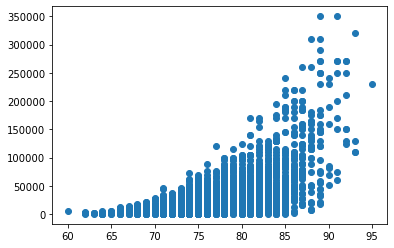

pace


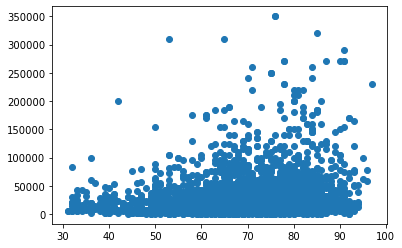

shooting


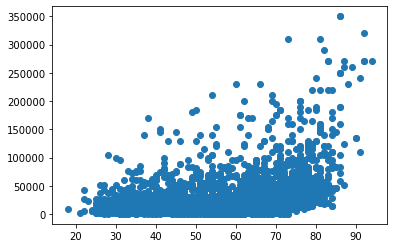

passing


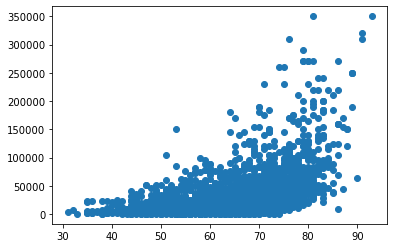

dribbling


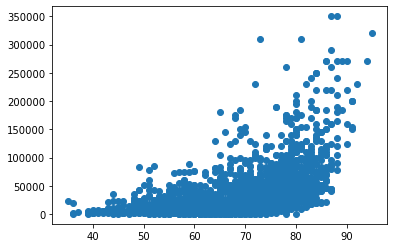

defending


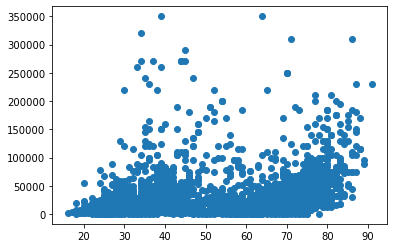

physic


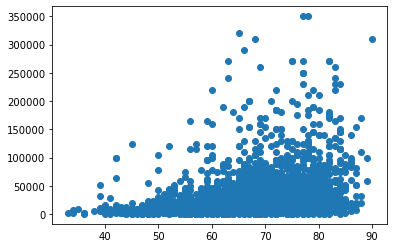

In [56]:
y = data_with_wage["wage_eur"]
y = pd.to_numeric(y, errors ="coerce")
fields = "age,games,minutes,goals,assists,cards_yellow,cards_red,overall,potential,pace,shooting,passing,dribbling,defending,physic"
fields = fields.rsplit(',')
for i in fields:
    print(i)
    x = data_with_wage[i]
    plt.scatter(x, y)
    plt.show()

In [10]:
from datetime import datetime
date_format = "%m.%d.%Y"
a = datetime.strptime('8.18.2008', date_format)
b = datetime.strptime('1.12.2021', date_format)
delta = b - a


4530


1

In [27]:

df = data_with_wage.copy()
# df = df[df['wage_eur'] < 50000]
df['team_avg'] = df.groupby(['squad'])['wage_eur'].transform('mean')
df['pos_avg'] = df.groupby(['position'])['wage_eur'].transform('mean')

df['team_std'] = df.groupby(['squad'])['wage_eur'].transform('std')
# df = pd.concat([df.drop('position', 1), data_with_wage['position'].str.get_dummies(sep=",")], 1)
# df = pd.concat([df.drop('squad', 1), df['squad'].str.get_dummies(sep=",")], 1)
positions = ["GK", "MF", "DF", "FW"]
for i, pos in enumerate(positions):
    df[pos] = np.repeat(0, len(df))
    df[pos] = df.apply(lambda row: 1 if pos in row.position else 0, axis = 1)
#     df['position_1'] = df.apply(lambda row: i if pos in row.position else 0, axis = 1)
    
df = df.reset_index().dropna()
df.to_csv('data.csv', encoding = 'utf8')
df

level_0  index season             player position  \
0           0      0   2022     Aaron Connolly       FW   
1           1      1   2022    Aaron Cresswell       DF   
2           2      2   2022       Aaron Hickey       DF   
3           3      3   2022       Aaron Lennon       MF   
4           4      4   2021   Aaron Leya Iseka       FW   
...       ...    ...    ...                ...      ...   
3399     4470   4470   2020     İsmail Köybaşı     DFFW   
3402     4475   4475   2020  Łukasz Teodorczyk     FWDF   
3403     4476   4476   2022      Šime Vrsaljko       DF   
3404     4477   4477   2019          Žan Celar       FW   
3405     4478   4478   2020          Žan Majer       MF   

                       squad  age  games  minutes  goals  ...  physic  \
0     Brighton & Hove Albion   21     24     2205      5  ...    64.0   
1            West Ham United   32     98     8626      4  ...    68.0   
2                    Bologna   19     26     2037      3  ...    56.0   
3                    Burnley   34     19     1826      1  ...    56.0   
4                    FC Metz   22     33     3229     10  ...    71.0   
...                      ...  ...    ...      ...    ...  ...     ...   
3399              Granada CF   30      3      231      0  ...    66.0   
3402                 Udinese   28      3      622      1  ...    71.0   
3403      Atlético de Madrid   29     19     1820      1  ...    77.0   
3404                    Roma   19      0        5      0  ...    68.0   
3405                   Lecce   27     19     1664      1  ...    65.0   

      wage_eur   value_eur      team_avg       pos_avg      team_std  GK  MF  \
0      23000.0   3300000.0  42954.545455  39873.708920  50522.019277   0   0   
1      66000.0  12500000.0  51259.259259  29878.048780  21418.167329   0   0   
2       7000.0   3200000.0  17411.111111  29878.048780  12272.333060   0   0   
3      28000.0   1400000.0  23310.344828  29828.812416  14392.715043   0   1   
4      22000.0   2400000.0  10483.870968  39873.708920   6201.456645   0   0   
...        ...         ...           ...           ...           ...  ..  ..   
3399   13000.0   1200000.0  19972.972973  25898.809524  25966.309889   0   0   
3402    9000.0   1400000.0  12916.071429  21774.324324   9526.425757   0   0   
3403   56000.0  18500000.0  62600.000000  29878.048780  47519.578542   0   0   
3404    3000.0   1300000.0  37548.387097  39873.708920  25058.383440   0   0   
3405    2000.0   1000000.0  20150.000000  29828.812416  46244.423087   0   1   

      DF  FW  
0      0   1  
1      1   0  
2      1   0  
3      0   0  
4      0   1  
...   ..  ..  
3399   1   1  
3402   1   1  
3403   1   0  
3404   0   1  
3405   0   0  

[3117 rows x 37 columns]

DF


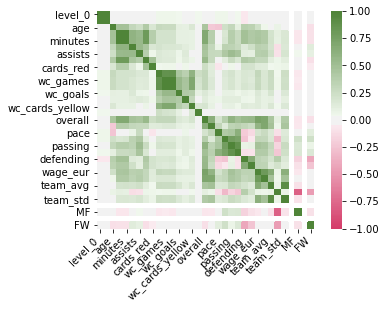

FW


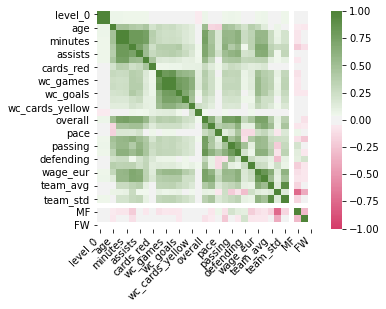

MF


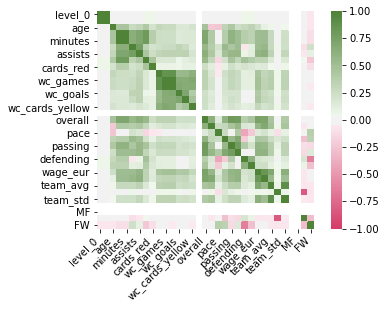

In [30]:
for pos in ["DF","FW","MF"]:
    print(pos)
    data_pos = df[df[pos] == 1]
    corr = data_pos.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(0, 120, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    plt.show()

In [31]:
from sklearn import manifold
from sklearn.decomposition import PCA

fields = "age,games,minutes,goals,assists,cards_yellow,cards_red,overall,potential,pace,shooting,passing,dribbling,defending,physic,wage_eur"
fields = fields.rsplit(',')
X = new_df.dropna()
wage = X['wage_eur']

print(X.head(3))
# for p in [5,10,15,20,25,30,35, 40, 45, 50]:
#     print(p)
#     tsne = manifold.TSNE(
#         n_components=2, init="random", random_state=0, perplexity=p
#     )
#     Y = tsne.fit_transform(X)
#     plt.scatter(Y[:,0], Y[:,1], c = wage)
#     plt.show()

svd = PCA(n_components=2, random_state=42)
Y = svd.fit_transform(X)
plt.scatter(Y[:,0], Y[:,1], c = wage)
plt.show()
print(svd.explained_variance_ratio_)




NameError: name 'new_df' is not defined

In [33]:
# df1 = pd.DataFrame([x.rsplit(',') for x in data_with_wage['position']], index=data_with_wage.index)
# df2 = pd.get_dummies(df1)
# df2

0_DF  0_DFFW  0_DFMF  0_FW  0_FWDF  0_FWMF  0_GK  0_GKDF  0_MF  0_MFDF  \
0        0       0       0     1       0       0     0       0     0       0   
1        1       0       0     0       0       0     0       0     0       0   
2        1       0       0     0       0       0     0       0     0       0   
3        0       0       0     0       0       0     0       0     1       0   
4        0       0       0     1       0       0     0       0     0       0   
...    ...     ...     ...   ...     ...     ...   ...     ...   ...     ...   
4474     0       0       0     0       0       0     1       0     0       0   
4475     0       0       0     0       1       0     0       0     0       0   
4476     1       0       0     0       0       0     0       0     0       0   
4477     0       0       0     1       0       0     0       0     0       0   
4478     0       0       0     0       0       0     0       0     1       0   

      0_MFFW  0_MFGK  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          0       0  
...      ...     ...  
4474       0       0  
4475       0       0  
4476       0       0  
4477       0       0  
4478       0       0  

[3406 rows x 12 columns]

In [34]:
import random
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
    # add some artificial outliers
    for i in np.arange(10):
        factor = random.randint(2, 4)
        if random.random() > 0.5:
            X[i] += factor * X.std()
        else:
            X[i] -= factor * X.std()
    return X, y

testX, testy = get_dataset()
print(testX.shape)

NameError: name 'make_regression' is not defined

age
Mean MAE: 20844.066 (1540.659)


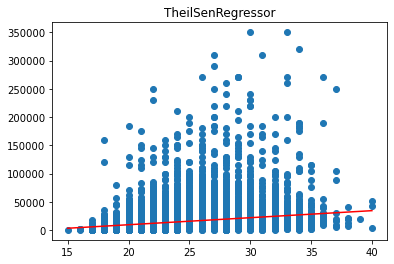

games
Mean MAE: 18420.192 (1197.030)


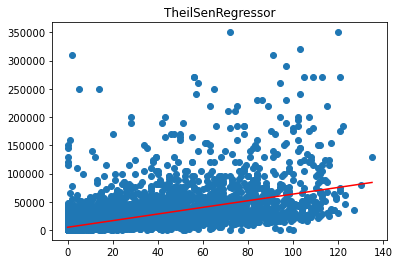

minutes
Mean MAE: 18669.678 (1244.252)


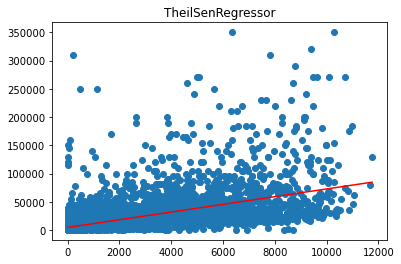

goals
Mean MAE: 19238.637 (1177.642)


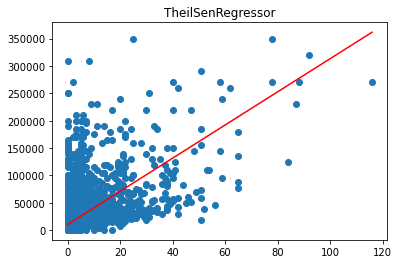

assists
Mean MAE: 18015.570 (1262.321)


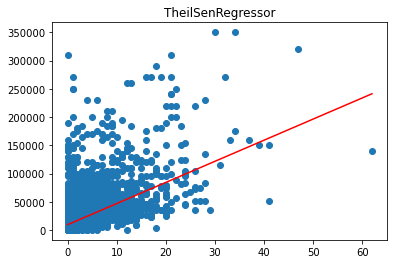

cards_yellow
Mean MAE: 20250.893 (1364.612)


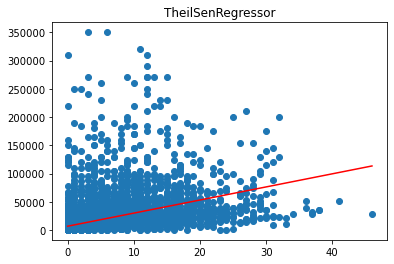

cards_red
Mean MAE: 21816.108 (1529.270)


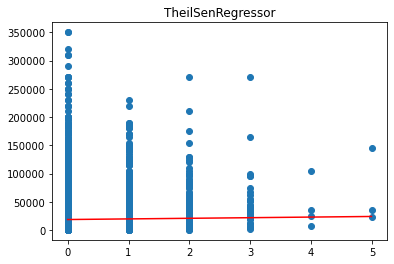

overall
Mean MAE: 15228.973 (1125.090)


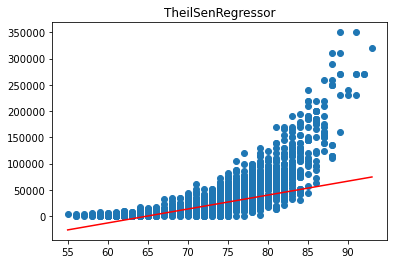

potential
Mean MAE: 18688.384 (1310.845)


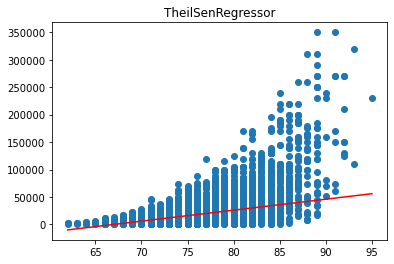

pace
Mean MAE: 21690.754 (1565.306)


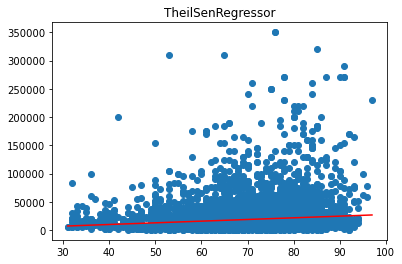

shooting
Mean MAE: 21002.987 (1539.358)


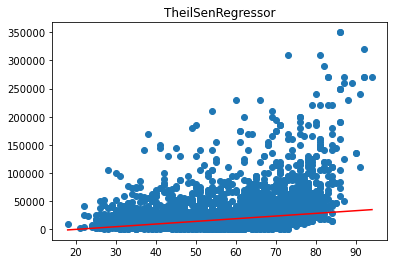

passing
Mean MAE: 19452.700 (1464.459)


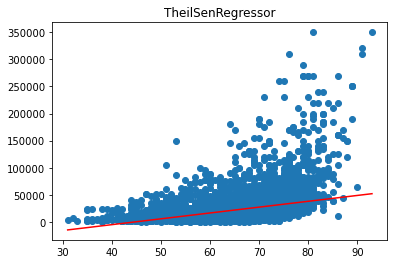

dribbling
Mean MAE: 19795.140 (1401.260)


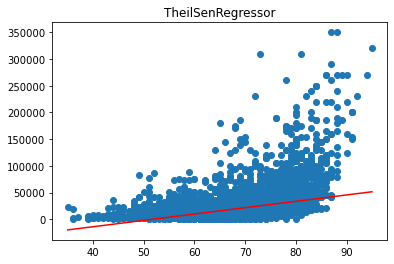

defending
Mean MAE: 21521.946 (1452.474)


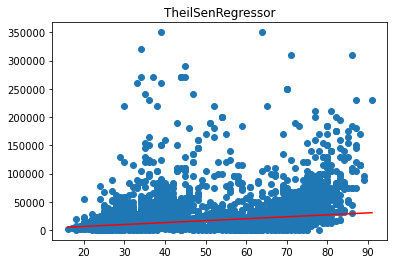

physic
Mean MAE: 20852.309 (1481.616)


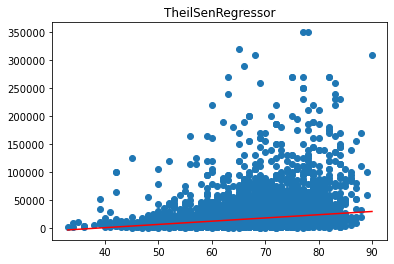

In [36]:
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

def get_data_of_pos(data, pos):
    data_pos = data[data[pos] == 1]
    fields = "age,games,minutes,goals,assists,cards_yellow,cards_red,overall,potential,pace,shooting,passing,dribbling,defending,physic"
    fields = fields.rsplit(',')
    X = data.dropna()
    y = X['wage_eur']
    X = X[fields]
    return X,y

# evaluate a model
def evaluate_model(X, y, model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return np.abs(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
    # fut the model on all data
    model.fit(X, y)
    # plot the dataset
    pyplot.scatter(X, y)
    # plot the line of best fit
    xaxis = np.arange(X.min(), X.max(), 0.01)
    yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
    pyplot.plot(xaxis, yaxis, color='r')
    # show the plot
    pyplot.title(type(model).__name__)
    pyplot.show()

# load dataset

fields = "age,games,minutes,goals,assists,cards_yellow,cards_red,overall,potential,pace,shooting,passing,dribbling,defending,physic"
fields = fields.rsplit(',')
for field in fields:
    print(field)
    X,y = get_data_of_pos(df, 'DF')
    X = np.expand_dims(np.array(X[field]),1)
    # define the model
    model = TheilSenRegressor()
    # evaluate model
    results = evaluate_model(X, y, model)
    print('Mean MAE: %.3f (%.3f)' % (np.mean(results), np.std(results)))
    # plot the line of best fit
    plot_best_fit(X, y, model)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
models = dict()
models['Linear'] = LinearRegression()
models['Huber'] = HuberRegressor()
models['RANSAC'] = RANSACRegressor()
models['TheilSen'] = TheilSenRegressor()

for name, model in models.items():
    X,y = get_data_of_pos(new_df, 'MF')
    X = np.expand_dims(np.array(X[field]),1)
    # define the model
    results = evaluate_model(X, y, model)
#     model.fit(X,y)
#     print(model.get_params())
#     print(model.score(X,y))
    
    print('Mean MAE: %.3f (%.3f)' % (np.mean(results), np.std(results)))

In [ ]:
model = HuberRegressor(fit_intercept = True)
model.fit(X,y)
plt.scatter(y, model.predict(X))

In [94]:
data_with_value.columns

Index(['index', 'season', 'player', 'nationality', 'position', 'squad', 'age',
       'birth_year', 'games', 'games_starts',
       ...
       'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'wage_eur', 'value_eur'],
      dtype='object', length=188)

In [116]:
columns = list(data_with_value.columns)


In [306]:
import plotly.express as px
# data_with_wage['physic_defending'] = data_with_wage.apply(lambda row: row.physic * row.defending, axis = 1)
it =  columns.pop()
df = data_with_wage.copy()

# df['test_1'] = df.apply(lambda row: row.age, axis = 1)
# df['test_2'] = df.apply(lambda row: row.value_eur, axis = 1)
print(it)
px.scatter(df, x=it, y="value_eur",color= "position", hover_data=["player"])


IndexError: pop from empty list

In [308]:
fields = data_with_wage.columns
fields = [_f for _f in fields if _f not in ['index', 'id', 'season', 'player', "position", "contract_signing", "league", "wage_eur"]]
# print(fields)
fig = px.scatter(df, x="nationality", y="wage_eur",color= "position", hover_data=["player"])
fig.show()

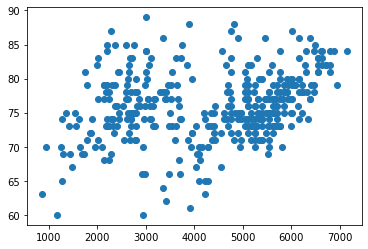

In [38]:
plt.scatter(x = data_with_wage.physic * data_with_wage.defending, y = data_with_wage.overall)

In [7]:
fields = "age,games,overall,potential,pace,shooting,passing,dribbling,defending,physic"
fields = fields.rsplit(',')
px.scatter_matrix(data_with_wage, dimensions= fields, color = data_with_wage.position).update_traces(diagonal_visible = False)

NameError: name 'px' is not defined

In [41]:
fbref = pd.read_excel("Complete_FBREF.xlsx")

In [49]:
import difflib
fbref['player'] = fbref.Player.map(lambda row: difflib.get_close_matches(row, data.player, cutoff = 0.9))
fbref['player'] = fbref.player.apply(lambda x: x[0] if len(x)!= 0 else None)

In [65]:
merged_data = pd.merge(data_with_wage, fbref, on = "player")
merged_data


id season           player position           squad  age  games  \
0    10120   2022      David Alaba       DF  Real Madrid CF   29   13.0   
1    10186   2022    Marco Asensio    FW,MF  Real Madrid CF   25   12.0   
2    10224   2022      Gareth Bale       FW  Real Madrid CF   32    3.0   
3    10302   2022    Karim Benzema       FW  Real Madrid CF   33   13.0   
4    10327   2022           Blanco       MF  Real Madrid CF   21    1.0   
..     ...    ...              ...      ...             ...  ...    ...   
295  11771   2022   Sergio Postigo       DF      Levante UD   33    3.0   
296  11795   2022   Nemanja Radoja       MF      Levante UD   28    7.0   
297  11845   2022            Rober       DF      Levante UD   26   10.0   
298  12038   2022  Roberto Soldado       FW      Levante UD   36    7.0   
299  12231   2022       Rúben Vezo       DF      Levante UD   27   13.0   

     minutes  goals  assists  ...  Offsides (17/18)  Crosses (17/18)  \
0     1162.0    1.0      3.0  ...               2.0             72.0   
1      612.0    4.0      0.0  ...               3.0             76.0   
2      190.0    1.0      0.0  ...              13.0             58.0   
3     1138.0   11.0      7.0  ...              17.0             18.0   
4       31.0    0.0      0.0  ...               NaN              NaN   
..       ...    ...      ...  ...               ...              ...   
295    187.0    0.0      0.0  ...               0.0              0.0   
296    447.0    0.0      0.0  ...               1.0              3.0   
297    610.0    1.0      0.0  ...               0.0              2.0   
298    368.0    0.0      0.0  ...               NaN              NaN   
299   1085.0    0.0      0.0  ...               1.0             13.0   

     Interceptions (17/18)  Penalty Kicks Won (17/18)  \
0                     10.0                        0.0   
1                      9.0                        0.0   
2                      7.0                        2.0   
3                      6.0                        1.0   
4                      NaN                        NaN   
..                     ...                        ...   
295                   36.0                        0.0   
296                    4.0                        0.0   
297                   25.0                        0.0   
298                    NaN                        NaN   
299                   13.0                        0.0   

     Penalties Conceded (17/18)  Own Goals (17/18)  \
0                           0.0                0.0   
1                           0.0                0.0   
2                           0.0                0.0   
3                           0.0                0.0   
4                           NaN                NaN   
..                          ...                ...   
295                         0.0                1.0   
296                         0.0                0.0   
297                         0.0                1.0   
298                         NaN                NaN   
299                         0.0                0.0   

     Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
0                                  170.0                     15.0   
1                                   98.0                      0.0   
2                                   67.0                     23.0   
3                                   81.0                      3.0   
4                                    NaN                      NaN   
..                                   ...                      ...   
295                                215.0                     11.0   
296                                125.0                     17.0   
297                                240.0                      8.0   
298                                  NaN                      NaN   
299                                204.0                     29.0   

     Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)  
0                  

In [1]:
for row in merged_data.columns:
    print(row)
    print(sum(merged_data[row].apply(lambda x: 1 if type(x) in [int, float] and np.isnan(x) else 0)))


NameError: name 'merged_data' is not defined